<a href="https://colab.research.google.com/github/kunyoungkim/streamlit-test/blob/main/GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- GeoPandas : https://geopandas.org/en/stable/

In [1]:
# -*- coding:utf-8 -*-
import geopandas as gpd

def main():
    print(gpd.__version__)

if __name__ == "__main__":
    main()

1.0.1


In [5]:
# world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world_gdf.head()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

- GeoPandas : https://geopandas.org/en/stable/
- naturalearthdata : https://www.naturalearthdata.com/downloads/

In [7]:
base_path = '/content/drive/MyDrive/git/geo_pandas/data'
states = gpd.read_file(base_path + '/ne_110m_admin_1_states_provinces.shp')
states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [12]:
states.loc[:, ['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(1)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."


### 데이터 살펴보기

In [13]:
states.shape

(51, 122)

In [14]:
states.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [16]:
states.geom_type.head(5)

,0
0,Polygon
1,Polygon
2,Polygon
3,MultiPolygon
4,Polygon


In [17]:
states.crs #좌표계 관련 정보

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
states.loc[:, ['adm1_code', 'iso_3166_2', 'name', 'geometry']].head()

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


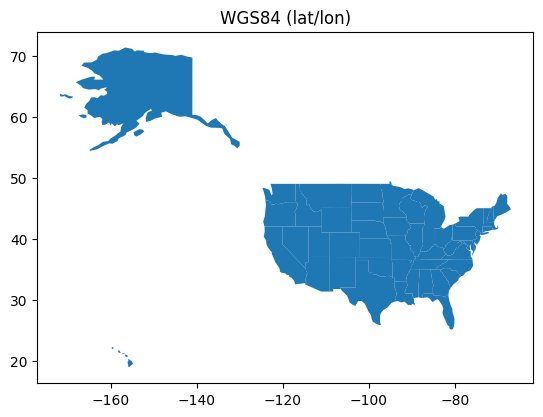

In [18]:
import matplotlib.pyplot as plt

ax = states.plot()
ax.set_title("WGS84 (lat/lon)");
plt.show()

# 하와이는 멀티 폴리곤으로 되어있음.

### 파일 내보내기

In [24]:
states.to_file(base_path + "/my_file.json", driver="GeoJSON")

In [27]:
df = gpd.read_file(base_path + "/my_file.json")
df.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


## 데이터 매핑

In [52]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.head()

base_path = '/content/drive/MyDrive/git/geo_pandas/naturalearth_lowres'
world = gpd.read_file(base_path + '/ne_110m_admin_0_map_units.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 map unit,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 map unit,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 map unit,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 map unit,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 map unit,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [53]:
# 가상 데이터 생성

import pandas as pd
import numpy as np

data = pd.DataFrame({
    'NAME':world['NAME'],
    'pop': np.random.randint(100, 1000, len(world))
})
data.head()

,NAME,pop
0,Fiji,875
1,Tanzania,482
2,W. Sahara,150
3,Canada,477
4,United States of America,465


In [54]:
# 데이터 매핑
world_df = world.merge(data, on='NAME')
world_df.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,pop
0,Admin-0 map unit,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",875
1,Admin-0 map unit,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",482
2,Admin-0 map unit,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",150
3,Admin-0 map unit,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",477
4,Admin-0 map unit,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",465


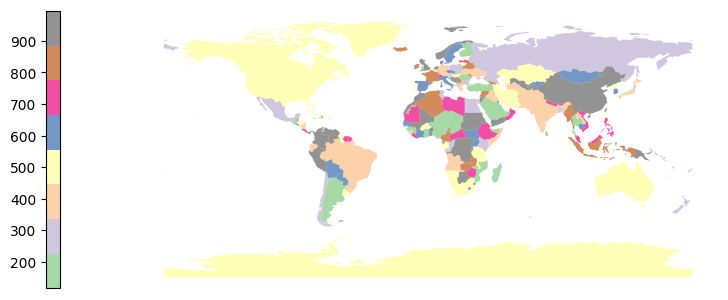

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
world_df.plot(ax=ax, column='pop', cmap="Accent", legend=False, alpha=0.7)
ax.set_axis_off()

cb = fig.colorbar(ax.collections[0], ax=ax, location = 'left', shrink= 0.6)
plt.show()

### 한반도 시각화

In [56]:
world.geom_type[:5]

,0
0,MultiPolygon
1,Polygon
2,Polygon
3,MultiPolygon
4,MultiPolygon


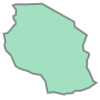

In [57]:
world.geometry[1]

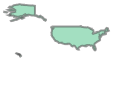

In [62]:
world.geometry[4]

In [63]:
type(world.geometry[3])

shapely.geometry.multipolygon.MultiPolygon

In [70]:
print(world.geometry[1].area)
print(world.geometry[1].length)

print(world.geometry[1])

76.30196359087157
37.26067078374819
POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673

In [75]:
kor_geom = world[world['NAME'].isin(['South Korea', 'North Korea'])].geometry
kor_geom

,geometry
95,"MULTIPOLYGON (((130.78 42.22001, 130.78 42.220..."
96,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."


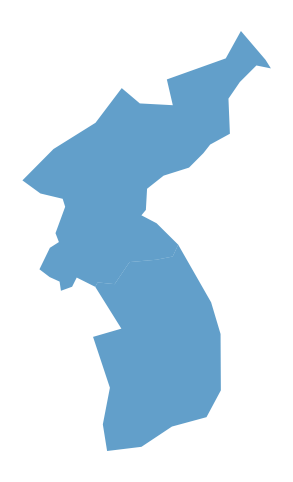

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
kor_geom.plot(ax=ax, alpha=0.7)
ax.set_axis_off()
plt.show()

In [82]:
# 각 국가의 수도 표시

In [83]:
cities = gpd.read_file(base_path + '/ne_110m_populated_places.shp')
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.9361)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,POINT (31.2 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,None,...,None,None,None,None,None,None,None,None,None,POINT (6.13 49.61166)


In [85]:
cities[cities['NAME'].isin(['Seoul', 'Pyongyang'])]

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
154,2,200,6,Admin-0 capital,Pyongyang,None,P'yongyang,Pyongyang,1,None,...,None,None,None,None,None,None,None,None,None,POINT (125.75274 39.02138)
194,1,300,3,Admin-0 capital,Seoul,None,None,Seoul,1,None,...,None,None,None,None,None,None,None,None,None,POINT (126.99779 37.5683)


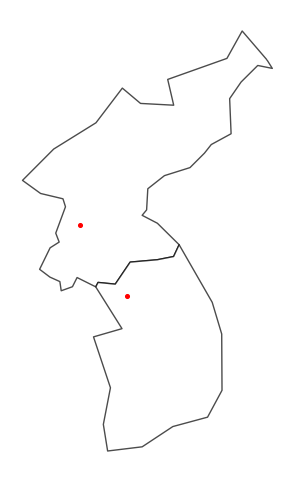

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = kor_geom.plot(ax=ax, alpha=0.7, color='white', edgecolor='k')
ax = cities[cities['NAME'].isin(['Seoul', 'Pyongyang'])].plot(ax=ax, color='red', markersize=7, marker='o')
ax.set_axis_off()
plt.show()

## 전체 리뷰
- GeoPandas
- GeoPandas 데이터 매핑, 시각화
- mtplotlib,